In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import linregress

from statsmodels.stats import proportion

In [19]:
DATA_PATH = 'data/Dataset/BeerAdvocate/ratings.csv'

ratings_df = pd.read_csv(DATA_PATH)

rating_per_beer = ratings_df.groupby('beer_id').agg(BeerName=('beer_name', 'min'), Count=('review', 'size'), Mean=('rating', 'mean')).sort_values(by='Mean')

In [20]:
ratings_df

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393027,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...,True
8393028,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...,True
8393029,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...,True
8393030,Nut Brown Ale,19140,Summit Station Restaurant & Brewery,885,English Brown Ale,5.3,1341741600,Redsox1539,redsox1539.683632,NaN,NaN,NaN,NaN,NaN,3.50,NaN,False


In [21]:
rating_per_date = ratings_df[['beer_id', 'beer_name', 'date', 'rating']].sort_values(by=['beer_id', 'date'])
rating_per_date = rating_per_date.dropna()
rating_per_date

,beer_id,beer_name,date,rating
8323005,3,Cactus Queen IPA,1019037600,4.02
8323004,3,Cactus Queen IPA,1037790000,3.88
8323003,3,Cactus Queen IPA,1047898800,4.42
8323023,4,Wildcatter's Crude Stout,1018000800,3.58
8323022,4,Wildcatter's Crude Stout,1037790000,3.68
...,...,...,...,...
2214341,293285,Common,1500890400,3.80
3402083,293286,Zero Dark Thirsty,1500890400,3.71
6477371,293294,Hazy Sunset,1500890400,3.99
5506051,293295,Imperial Red Ale,1500890400,3.40


In [22]:
beer_counts = rating_per_date.groupby('beer_id').size()
id_to_keep = beer_counts[beer_counts > 1000].index
id_to_keep

Index([     5,      6,      7,     10,     17,     30,     31,     33,     34,
           36,
       ...
       179482, 181572, 182256, 187317, 189272, 190513, 197183, 199848, 202078,
       211516],
      dtype='int64', name='beer_id', length=1404)

In [23]:
rating_per_date = rating_per_date[rating_per_date['beer_id'].isin(id_to_keep)]
rating_per_date['review_count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')
rating_per_date

/var/folders/9z/qtyp_jyn7rnbcj96bcx367hh0000gn/T/ipykernel_35052/1873467221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_per_date['review_count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')


,beer_id,beer_name,date,rating,review_count
1326290,5,Amber,994586400,4.00,1680
1326289,5,Amber,1017741600,3.38,1680
1326288,5,Amber,1018432800,3.98,1680
1326287,5,Amber,1020938400,3.65,1680
1326286,5,Amber,1022580000,3.30,1680
...,...,...,...,...,...
3105635,211516,Doppelganger,1500976800,4.64,1162
3105632,211516,Doppelganger,1501063200,4.48,1162
3105633,211516,Doppelganger,1501063200,4.39,1162
3105630,211516,Doppelganger,1501149600,4.64,1162


In [189]:
first_rate = rating_per_date.groupby('beer_id').head(10)
first_rate

,beer_id,beer_name,date,rating,review_count
1326290,5,Amber,994586400,4.00,1680
1326289,5,Amber,1017741600,3.38,1680
1326288,5,Amber,1018432800,3.98,1680
1326287,5,Amber,1020938400,3.65,1680
1326286,5,Amber,1022580000,3.30,1680
...,...,...,...,...,...
3105837,211516,Doppelganger,1453546800,4.64,1162
3105838,211516,Doppelganger,1453546800,4.25,1162
3105839,211516,Doppelganger,1453546800,4.60,1162
3105840,211516,Doppelganger,1453546800,4.90,1162


In [190]:
rating_first_vs_overall = rating_per_date.groupby('beer_id').agg( beer_name = ('beer_name', 'min'), review_count = ('review_count', 'min'), overall_mean = ('rating', 'mean'))
rating_first_vs_overall

,beer_name,review_count,overall_mean
beer_id,,,
5,Amber,1680,3.453768
6,Turbodog,2894,3.661320
7,Purple Haze,3293,3.277643
10,Allagash Dubbel Ale,1707,3.806157
17,Widmer Hefeweizen,2117,3.318611
...,...,...,...
190513,Project PAM,1039,4.199577
197183,Citradelic Tangerine IPA,1671,3.840592
199848,Stone Pataskala Red X IPA,1056,4.070540


In [191]:
rating_first_vs_overall['first_rates_mean'] = first_rate.groupby('beer_id')['rating'].mean()
rating_first_vs_overall

,beer_name,review_count,overall_mean,first_rates_mean
beer_id,,,,
5,Amber,1680,3.453768,3.468
6,Turbodog,2894,3.661320,3.611
7,Purple Haze,3293,3.277643,3.160
10,Allagash Dubbel Ale,1707,3.806157,3.904
17,Widmer Hefeweizen,2117,3.318611,3.966
...,...,...,...,...
190513,Project PAM,1039,4.199577,4.153
197183,Citradelic Tangerine IPA,1671,3.840592,4.092
199848,Stone Pataskala Red X IPA,1056,4.070540,3.874


In [192]:
corr = rating_first_vs_overall['first_rates_mean'].corr(rating_first_vs_overall['overall_mean'])
print("Correlation:", corr)

Correlation: 0.8871648080761957


In [193]:
plot_sub_sample = rating_first_vs_overall.sample(5)
plot_sub_sample

,beer_name,review_count,overall_mean,first_rates_mean
beer_id,,,,
20781,Brew Free Or Die IPA,3226,3.857926,4.199
169625,Calm Before The Storm,1171,3.872442,4.123
34313,Kuhnhenn Bourbon Barrel Fourth Dementia,1915,4.551499,4.600
51480,Brooklyn Sorachi Ace,2826,4.084862,4.117
19488,Happy Ending Imperial Stout,1123,3.919644,3.988


In [194]:
labels = plot_sub_sample['beer_name']
overall_means = plot_sub_sample['overall_mean']
first_means = plot_sub_sample['first_rates_mean']

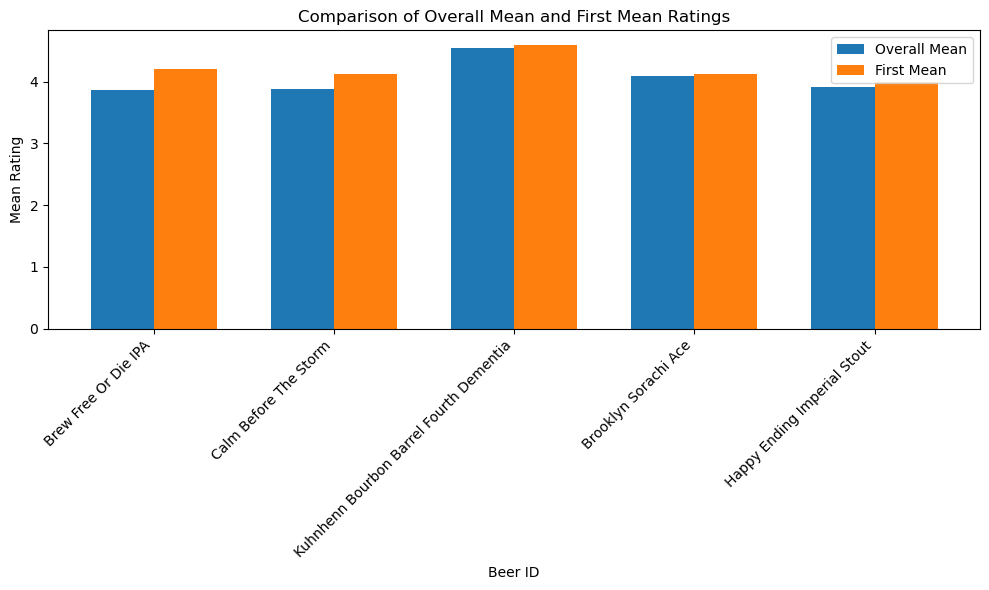

In [195]:

# Largeur des barres
width = 0.35
x = np.arange(len(labels))

# Création du bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, overall_means, width, label='Overall Mean')
ax.bar(x + width/2, first_means, width, label='First Mean')

# Personnalisation des labels et de la légende
ax.set_xlabel('Beer ID')
ax.set_ylabel('Mean Rating')
ax.set_title('Comparison of Overall Mean and First Mean Ratings')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# TODO Add br_score in the plot

Test statistic :)

H0 => the two means have same expected
H1 => they have

a = 0.05

In [196]:
std_first_means = (first_means-first_means.mean())/first_means.std()
std_overall_means = (overall_means-overall_means.mean())/overall_means.std()

t_stat, p_value = ttest_ind(std_first_means, std_overall_means, equal_var=False)

# Affichage des résultats
print("Statistique t :", t_stat)
print("Valeur p :", p_value)

if p_value < 0.05:
    print("Il existe une différence significative entre les premières notes et les autres (p < 0.05).")
else:
    print("Aucune différence significative entre les premières notes et les autres (p >= 0.05).")

Statistique t : 1.0076092054815131e-14
Valeur p : 0.9999999999999922
Aucune différence significative entre les premières notes et les autres (p >= 0.05).


In [197]:
slope, intercept, r_value, p_value, std_err = linregress(std_first_means, overall_means)

print("Corrélation linéaire (r) :", r_value)
print("Valeur p :", p_value)

if p_value < 0.05 and abs(r_value) > 0.7:
    print("Il y a une forte dépendance entre la première note et la note finale.")
else:
    print("La première note n'a pas d'influence significative sur la note finale.")


Corrélation linéaire (r) : 0.8814488019552006
Valeur p : 0.04811884037736649
Il y a une forte dépendance entre la première note et la note finale.


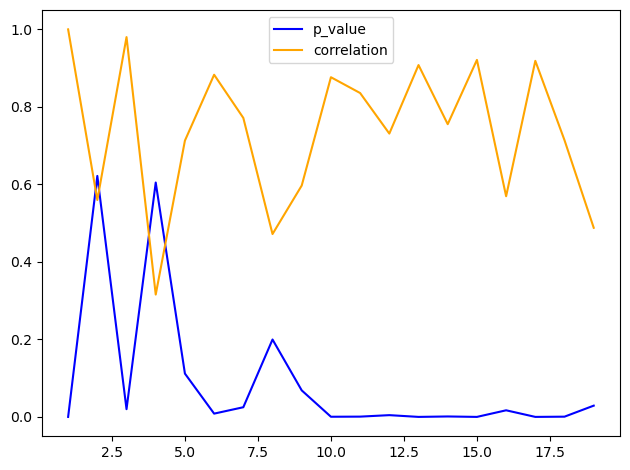

In [171]:
tmp1 = rating_per_date.groupby('beer_id').head(4)
tmp2 = rating_per_date.groupby('beer_id').agg( beer_name = ('beer_name', 'min'), review_count = ('review_count', 'min'), overall_mean = ('rating', 'mean'))
tmp2['first_rates_mean'] = tmp1.groupby('beer_id')['rating'].mean()

tmp_p_value = []
tmp_corr = []

max_iter = 20

tmp_ar = np.arange(max_iter)

for i in range(max_iter):
    tmp3 = tmp2.sample(i+1, replace=True)
    tmp_overall_mean = tmp3['overall_mean']
    tmp_first_means = tmp3['first_rates_mean']

    tmp_first_means = (tmp_first_means-tmp_first_means.mean())/tmp_first_means.std()
    tmp_overall_means = (tmp_overall_mean-tmp_overall_mean.mean())/tmp_overall_mean.std()

    slope, intercept, r_value, p_value, std_err = linregress(tmp_first_means, tmp_overall_means)
    tmp_p_value.append(p_value)
    tmp_corr.append(r_value)

plt.plot(tmp_ar, tmp_p_value, color='blue', label='p_value')
plt.plot(tmp_ar, tmp_corr, color='orange', label='correlation')

plt.legend()
plt.tight_layout()
plt.show()

The more we take the first beer into account, the more their rating will influence other (If they see 1 personne vs 10 personne that have the same opinion, they will be more influenced by the 10), but in the other hand, the more we take the first rate into account, the more their ratigny might be a good approximation. So the fact that rating more beer int the "first rating" group will